In [199]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

plotly.offline.init_notebook_mode(connected=True)



In [203]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
country_continent = pd.read_csv(url).loc[:,["country", "continent"]].drop_duplicates()
country_continent.head()


,country,continent
0,Afghanistan,Asia
12,Albania,Europe
24,Algeria,Africa
36,Angola,Africa
48,Argentina,Americas


In [204]:

gdp_urbanization = pd.read_csv("../resources/urbanization-vs-gdp.csv").rename(columns ={"Entity":"country","Share of population living in urban areas (%)":"urban_share","GDP per capita (2011 int-$) ($)":"gdp_per_capita","Total population (Gapminder)":"population"})

gdp_urbanization = pd.merge(gdp_urbanization, country_continent, on="country", how="left")


In [205]:
def gdp_per_capita_year(year):
    gdp_per_capita_year = gdp_urbanization.loc[(gdp_urbanization["Year"] == year) & (gdp_urbanization.Code.notnull()), :]
    gdp_per_capita_year = gdp_per_capita_year.dropna()
    
    return gdp_per_capita_year

In [206]:
def create_map(codes, variable,label_text, title, legend_text, legend_prefix,source):
    data = [
        go.Choropleth(
            locations = codes,
            z = variable,
            text = label_text,
            colorscale = 
                [
                    [0, "rgb(5, 10, 172)"],
                    [0.35, "rgb(40, 60, 190)"],
                    [0.5, "rgb(70, 100, 245)"],
                    [0.6, "rgb(90, 120, 245)"],
                    [0.7, "rgb(106, 137, 247)"],
                    [1, "rgb(220, 220, 220)"]
                ],
            autocolorscale = False,
            reversescale = True,
            marker = 
                go.choropleth.Marker(
                    line = go.choropleth.marker.Line(color = 'rgb(180,180,180)', width = 0.5)
                ),
            colorbar = 
                go.choropleth.ColorBar(
                    tickprefix = legend_prefix,
                    title = legend_text
                )
        )
    ]

    layout = go.Layout(
            title = go.layout.Title(text = title),
            geo = go.layout.Geo(
                showframe = False,
                showcoastlines = False,
                projection = 
                    go.layout.geo.Projection(
                        type = 'equirectangular'
                    )
            ),
            annotations = 
                [
                    go.layout.Annotation(
                        x = 0.55,
                        y = 0.1,
                        xref = 'paper',
                        yref = 'paper',
                        text = source,
                        showarrow = False
                    )
                ]
        )

    plotly.offline.iplot({
            "data": data,
            "layout": layout
    })
    


   
  


In [207]:
gdp_urbanization.head(5)

,country,Code,Year,urban_share,gdp_per_capita,population,continent
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0,Asia
1,Afghanistan,AFG,1820,NaN,NaN,3280000.0,Asia
2,Afghanistan,AFG,1870,NaN,NaN,4207000.0,Asia
3,Afghanistan,AFG,1913,NaN,NaN,5730000.0,Asia
4,Afghanistan,AFG,1950,6.0,2392.0,8151455.0,Asia


In [208]:

gdp_per_capita_year(1997).head()

,country,Code,Year,urban_share,gdp_per_capita,population,continent
51,Afghanistan,AFG,1997,21.805,926.0,21299350.0,Asia
298,Albania,ALB,1997,40.035,4406.0,3091902.0,Europe
370,Algeria,DZA,1997,57.544,6897.0,29242917.0,Africa
584,Angola,AGO,1997,46.525,1851.0,12792237.0,Africa
882,Argentina,ARG,1997,88.564,16353.0,35714929.0,Americas


In [209]:
year = 1995
create_map(
    codes = gdp_per_capita_year(year)['Code'], 
    variable = gdp_per_capita_year(year)['urban_share'],
    label_text = gdp_per_capita_year(year)['country'], 
    title = f'{year} Share of population living in urban areas (%)', 
    legend_text = 'Share of Population<br>(percentage))', 
    legend_prefix = '%',
    source = 'Source: <a href="https://ourworldindata.org/economic-growth">OurWorldInData</a>'
)


In [210]:
create_map(
    codes = gdp_per_capita_year(year)['Code'], 
    variable = gdp_per_capita_year(year)['gdp_per_capita'],
    label_text = gdp_per_capita_year(year)['country'], 
    title = f'{year} GDP per capita', 
    legend_text = 'GDP<br>Billions US$', 
    legend_prefix = '$',
    source = 'Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">CIA World Factbook</a>'
)

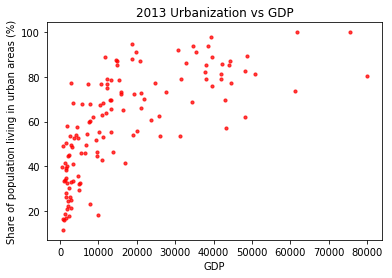

In [211]:
year = 2013
def scatt_plot(year):
    y = gdp_per_capita_year(year)['urban_share']
    x = gdp_per_capita_year(year)['gdp_per_capita']
    plt.scatter(x, y, marker="o", facecolors="red", edgecolors="red", s=10, alpha=0.75)
    plt.title(f"{year} Urbanization vs GDP")
    plt.xlabel("GDP")
    plt.ylabel("Share of population living in urban areas (%)")
    plt.savefig("../output/Urbanization vs GDP.png")
    plt.show()
scatt_plot(2013)

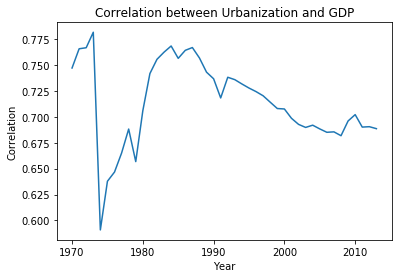

In [254]:
beg_year = 1970
end_year = 2014
correlations = pd.DataFrame({
    "YEAR": list (range(beg_year, end_year)),
    "Corr" : np.nan
})
for i in range(beg_year, end_year):
    y=gdp_per_capita_year(i)['urban_share']
    x=gdp_per_capita_year(i)['gdp_per_capita']
    correlations.loc[correlations["YEAR"]==i, "Corr"] = np.corrcoef(x, y)[1,0]
    
fig = plt.figure()
ax = plt.axes()

ax.plot(correlations["YEAR"], correlations["Corr"]);
plt.title("Correlation between Urbanization and GDP")
plt.xlabel("Year")
plt.ylabel("Correlation")
plt.show()

In [257]:
df=gdp_urbanization.loc[(gdp_urbanization["Year"] >= beg_year) & (gdp_urbanization["Year"]<=end_year),:]

years = list (range(beg_year, end_year))
# make list of continents
continents = []
for continent in df['continent']:
    if continent not in continents:
        continents.append(continent)
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [0, 100000], 'title': 'GDP'}
figure['layout']['yaxis'] = {'title': 'Urbanization', 'type': 'log'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 300,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '0',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': True,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
year = beg_year
for continent in continents:
    dataset_by_year = df[df['Year'] == year]
    dataset_by_year_and_cont = dataset_by_year[dataset_by_year['continent'] == continent]

    data_dict = {
        'x': list(dataset_by_year_and_cont['gdp_per_capita']),
        'y': list(dataset_by_year_and_cont['urban_share']),
        'mode': 'markers',
        'text': list(dataset_by_year_and_cont['country']),
        'marker': {
            'sizemode': 'area',
            'sizeref': 200000,
            'size': list(dataset_by_year_and_cont['population'])
        },
        'name': continent
    }
    figure['data'].append(data_dict)
    
# make frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    for continent in continents:
        dataset_by_year = df[df['Year'] == year]
        dataset_by_year_and_cont = dataset_by_year[dataset_by_year['continent'] == continent]

        data_dict = {
            'x': list(dataset_by_year_and_cont['gdp_per_capita']),
            'y': list(dataset_by_year_and_cont['urban_share']),
            'mode': 'markers',
            'text': list(dataset_by_year_and_cont['country']),
            'marker': {
                'sizemode': 'area',
                'sizeref': 200000,
                'size': list(dataset_by_year_and_cont['population'])
            },
            'name': continent
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': True},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)
plotly.offline.plot(figure, filename='animation.html')

'animation.html'